In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

sns.set_theme()  
%matplotlib inline

C:\Users\ES\AppData\Local\Temp\ipykernel_12500\3125953439.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Dati

In [2]:
df = pd.read_csv('./Lezioni.csv')

In [3]:
#df = df[df[' Professoressa'] == ' Chiara']

In [4]:
#df = df[(df['Index'] >= 100) & (df['Index'] <= 154)]

In [5]:
righe, colonne = df.shape

In [6]:
def guia(data_frame):
    linhas, qnt_colunas = data_frame.shape
    sequencia = list(range(qnt_colunas + 1))
    sequencia = sequencia[1:]

    colunas = data_frame.columns.to_list()
    lista_tipos = [str(type(data_frame[col][0])).split("'")[1] for col in data_frame.columns]
    lista_categorias = [data_frame[col].nunique() for col in data_frame.columns]

    elementos_nulos = data_frame.isnull().sum()
    elementos_nulos = elementos_nulos.to_list()

    percentual_dados_nulos = round((data_frame.isnull().sum() / linhas) * 100)
    percentual_dados_nulos = percentual_dados_nulos.to_list()

    dados = pd.DataFrame({'Nome': colunas, 
                          'Tipo': lista_tipos, 
                          'qnt_categorias': lista_categorias,
                          'Dados nulos' : elementos_nulos,
                          'Dados nulos %' : percentual_dados_nulos}, index=sequencia)
    
    # Cabeçalhos
    print('Tabela Exploratória')
    print(f'Nesses dados temos {linhas} linhas e {qnt_colunas} colunas.')
    
    return dados

guia_df = guia(df)
guia_df.head(10)

Tabela Exploratória
Nesses dados temos 189 linhas e 10 colunas.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %
1,Unnamed: 0,numpy.int64,189,0,0.0
2,Index,numpy.int64,189,0,0.0
3,Data,str,120,0,0.0
4,Ora,numpy.int64,7,0,0.0
5,Professoressa,str,42,0,0.0
6,Livello,str,3,0,0.0
7,Lezione,str,84,0,0.0
8,Giorno della settimana,str,7,0,0.0
9,Mese,str,9,0,0.0
10,Anno,numpy.int64,1,0,0.0


In [7]:
df = df.drop('Unnamed: 0', axis=1)

# Tabella

In [8]:
df.head()

,Index,Data,Ora,Professoressa,Livello,Lezione,Giorno della settimana,Mese,Anno
0,1,2023-05-22,8,Virginia,B1,B132,Lunedì,Maggio,2023
1,2,2023-05-22,11,Graziana,B1,B135,Lunedì,Maggio,2023
2,3,2023-05-23,10,Francesca,C1,C123,Martedì,Maggio,2023
3,4,2023-05-23,11,Sara,B1,B143,Martedì,Maggio,2023
4,5,2023-05-24,10,Alice,B1,B141,Mercoledì,Maggio,2023


In [9]:
def data_finiziale_finale(dat_frame, dfi):
    if dfi == 0:
        dt_iniziale = dat_frame.head(1)
        dt_iniziale = dt_iniziale[' Data'].to_list()
        dt_iniziale = dt_iniziale[0]
        
        return dt_iniziale
    
    elif dfi == 1:
        dt_finale = dat_frame.tail(1)
        dt_finale = dt_finale[' Data'].to_list()
        dt_finale = dt_finale[0]

        return dt_finale

# Durata

In [10]:
# Definisci le date

data1 = datetime.strptime(data_finiziale_finale(df, 0), '%Y-%m-%d')
data2 = datetime.strptime(data_finiziale_finale(df, 1), '%Y-%m-%d')

# Calcola la differenza tra le date
diff = data2 - data1

print(f"Il numero di giorni tra il {data_finiziale_finale(df, 0)} e il {data_finiziale_finale(df, 1)} è {diff.days}.")

Il numero di giorni tra il 2023-05-22 e il 2023-12-27 è 219.


In [11]:
df_categoricos = df.select_dtypes('object')
df_categoricos

,Data,Professoressa,Livello,Lezione,Giorno della settimana,Mese
0,2023-05-22,Virginia,B1,B132,Lunedì,Maggio
1,2023-05-22,Graziana,B1,B135,Lunedì,Maggio
2,2023-05-23,Francesca,C1,C123,Martedì,Maggio
3,2023-05-23,Sara,B1,B143,Martedì,Maggio
4,2023-05-24,Alice,B1,B141,Mercoledì,Maggio
...,...,...,...,...,...,...
184,2023-12-12,Lorella,C1,C132,Martedì,Dicembre
185,2023-12-13,Federica,B2,B210,Mercoledì,Dicembre
186,2023-12-14,Francesca 2,B2,B235,Giovedì,Dicembre
187,2023-12-15,Chiara,C1,C101,Venerdì,Dicembre


In [12]:
df_categoricos.describe().transpose() # freq / count = %

,count,unique,top,freq
Data,189,120,2023-06-20,6
Professoressa,189,42,Federica,26
Livello,189,3,C1,71
Lezione,189,84,C123,8
Giorno della settimana,189,7,Martedì,45
Mese,189,9,Agosto,33


In [13]:
df_numericos = df.select_dtypes('number')
df_numericos.drop('Index', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ora,189.0,8.767196,1.694416,7.0,7.0,8.0,10.0,13.0
Anno,189.0,2023.000000,0.000000,2023.0,2023.0,2023.0,2023.0,2023.0


In [14]:
189 / 219

0.863013698630137

In [15]:
df.columns

Index(['Index', ' Data', 'Ora', ' Professoressa', 'Livello', 'Lezione',
       'Giorno della settimana', 'Mese', 'Anno'],
      dtype='object')

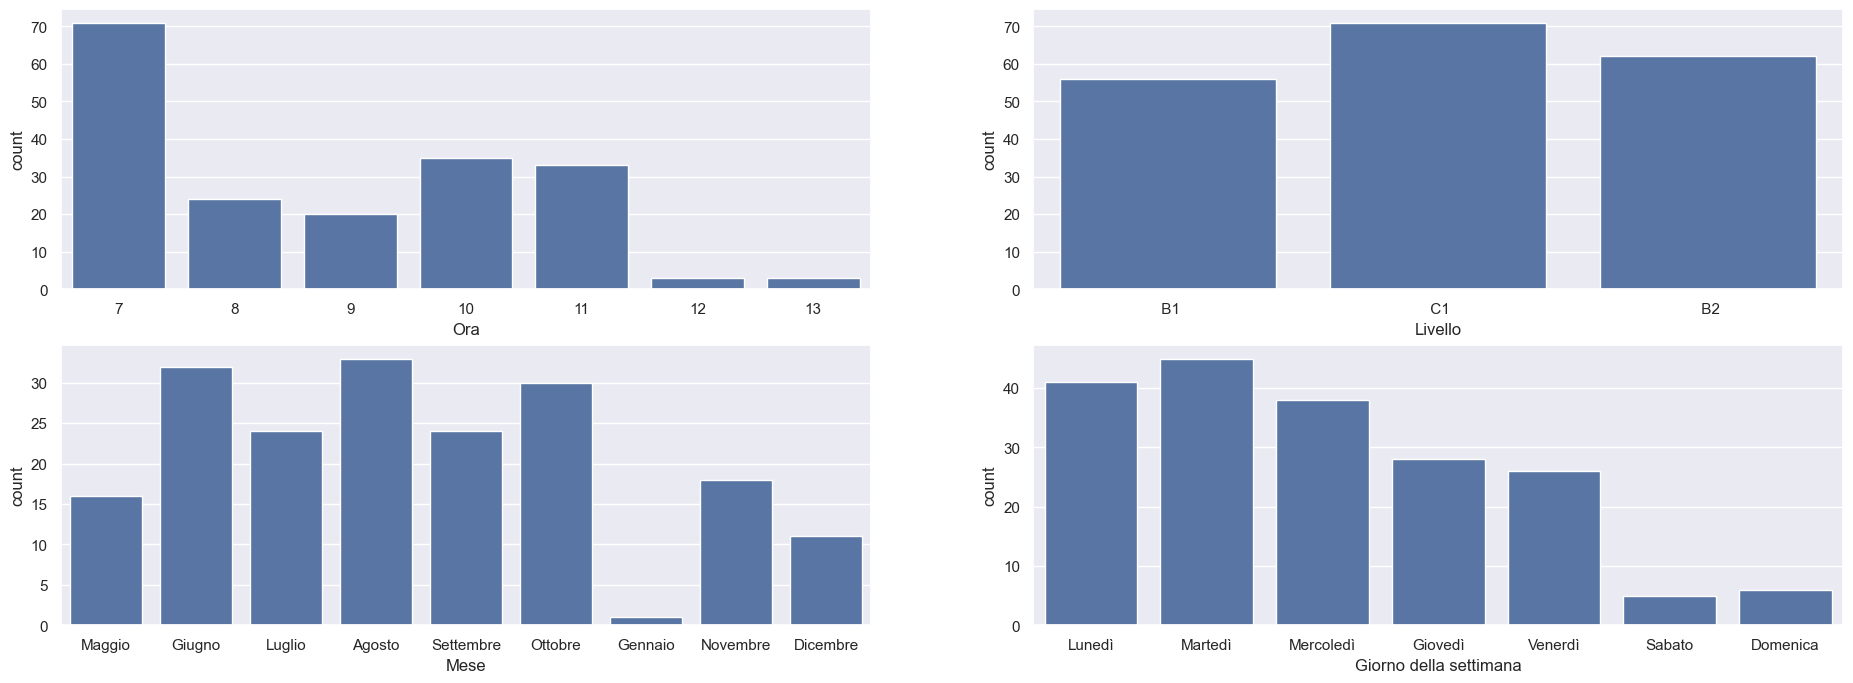

In [16]:
plt.close('all')
plt.rc('figure', figsize=(23, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x='Ora', data=df)
sns.countplot(ax = axes[0, 1], x='Livello', data=df)
sns.countplot(ax = axes[1, 0], x='Mese', data=df)
sns.countplot(ax = axes[1, 1], x='Giorno della settimana', data=df)

plt.savefig('Grafici')

# Grafici

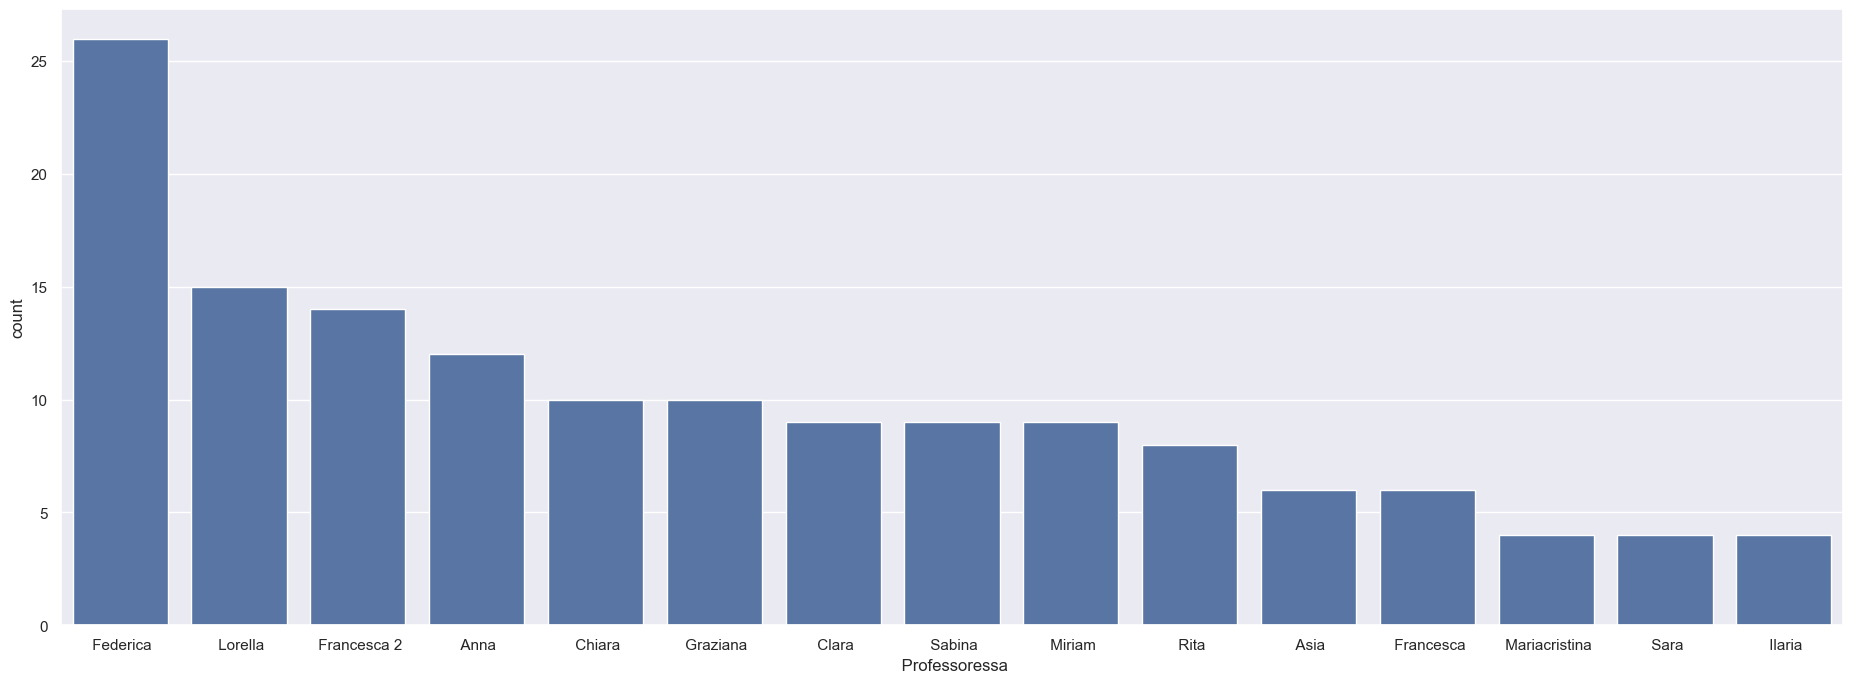

In [17]:
numero_di_barre = 15
sns.countplot(x=' Professoressa', data=df, order=df[' Professoressa'].value_counts().iloc[:numero_di_barre].index)
plt.savefig('Insegnanti')

In [18]:
import pandas as pd

# Creare un dataframe di esempio
df = pd.DataFrame({'date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29', '2021-01-30', '2021-01-31'],
                   'value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]})

# Convertire la colonna 'date' in tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Raggruppare i dati per settimana e calcolare la media della colonna 'value'
weekly_avg = df.resample('W', on='date')['value'].mean()

print(weekly_avg)


date
2021-01-03     2.0
2021-01-10     7.0
2021-01-17    14.0
2021-01-24    21.0
2021-01-31    28.0
Freq: W-SUN, Name: value, dtype: float64


In [19]:
sns.countplot(x=' Professoressa', data=df, order=df[' Professoressa'].value_counts().sort_values(ascending=True).iloc[:15].index)

KeyError: ' Professoressa'

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


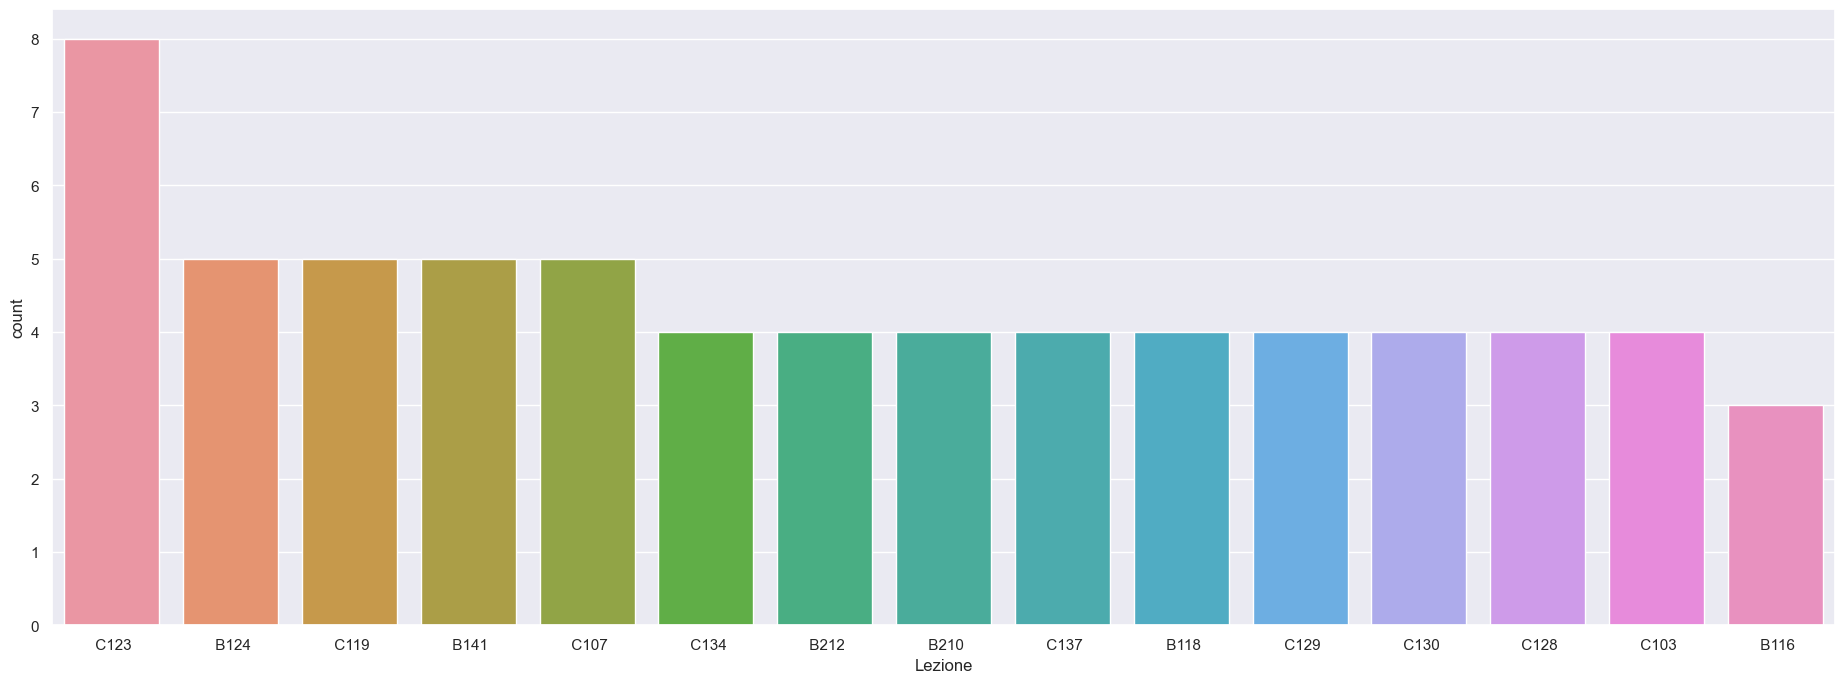

In [ ]:
numero_di_barre = 15
sns.countplot(x='Lezione', data=df, order=df['Lezione'].value_counts().iloc[:numero_di_barre].index)
plt.savefig('Lezioni più frequenti')

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


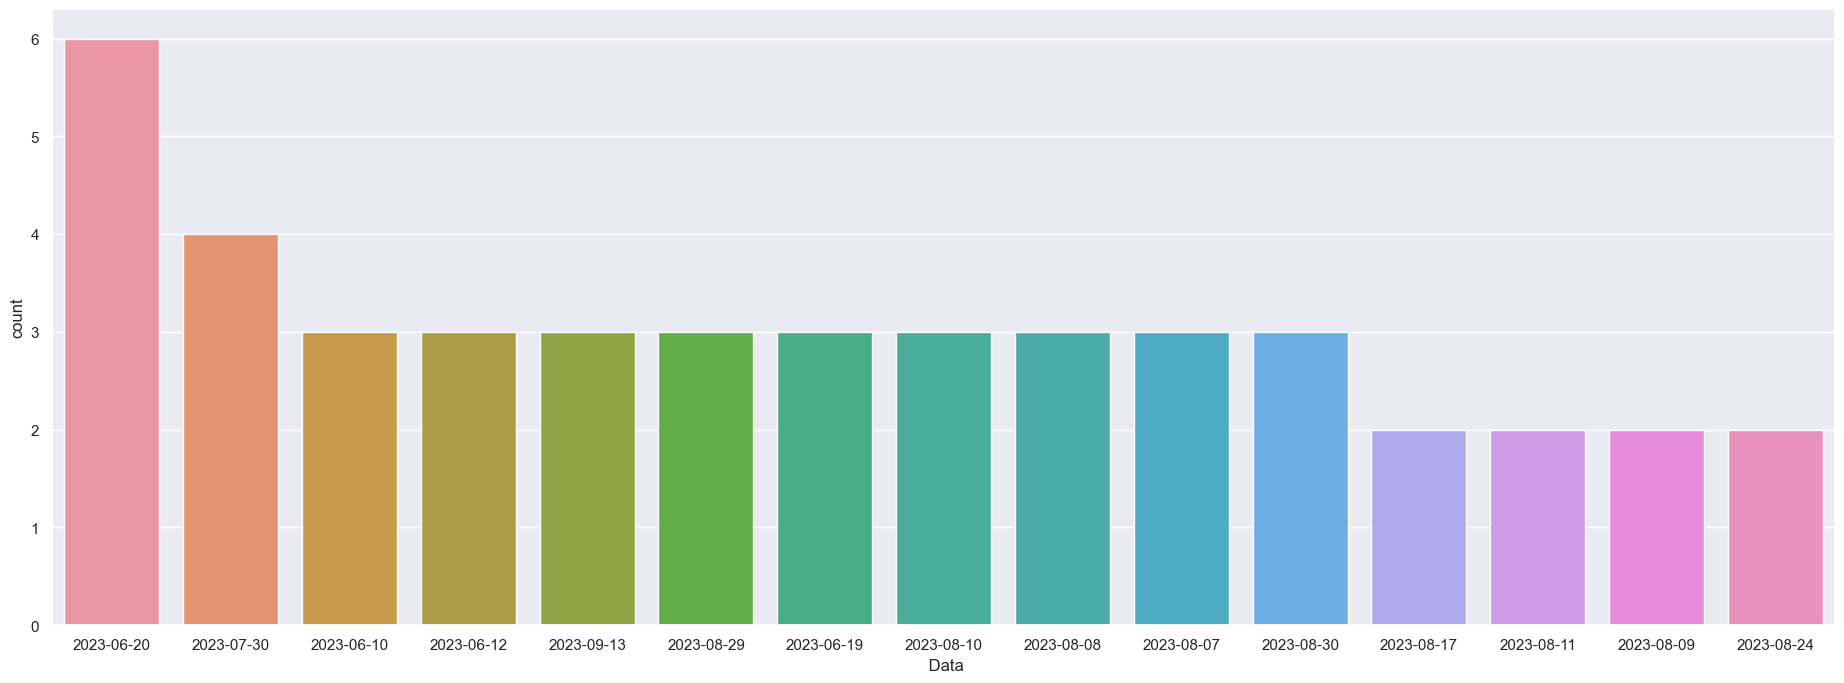

In [ ]:
numero_di_barre = 15
sns.countplot(x=' Data', data=df, order=df[' Data'].value_counts().iloc[:numero_di_barre].index)
plt.savefig('Immersioni')

# Fine

In [ ]:
#df.groupby(['Mese', 'Livello'])['Index'].count().unstack().plot(figsize=[15,5]);